<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500, height=450>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

### Задача определения частей речи, Part-Of-Speech Tagger (POS)

Мы будем решать задачу определения частей речи (POS-теггинга) с помощью скрытой марковской модели (HMM).

In [1]:
import nltk
import pandas as pd
import numpy as np
from collections import OrderedDict, deque
from nltk.corpus import brown
import matplotlib.pyplot as plt

Вам в помощь http://www.nltk.org/book/

Загрузим brown корпус

In [2]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

Существует множество наборов грамматических тегов, или тегсетов, например:
* НКРЯ
* Mystem
* UPenn
* OpenCorpora (его использует pymorphy2)
* Universal Dependencies

<b>Существует не одна система тегирования, поэтому будьте внимательны, когда прогнозируете тег слов в тексте и вычисляете качество прогноза. Можете получить несправедливо низкое качество вашего решения.

На данный момент стандартом является **Universal Dependencies**. Подробнее про проект можно почитать [вот тут](http://universaldependencies.org/), а про теги — [вот тут](http://universaldependencies.org/u/pos/)

In [3]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

<img src="https://4.bp.blogspot.com/-IcFli2wljs0/WrVCw3umY_I/AAAAAAAACYM/UJ_neoUAs3wF95dj2Ouf3BzxXzB_b2TbQCLcBGAs/s1600/postags.png">


Мы имеем массив предложений пар (слово-тег)

In [4]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")
brown_tagged_sents

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

Первое предложение

In [5]:
brown_tagged_sents[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

Все пары (слово-тег)

In [6]:
brown_tagged_words = brown.tagged_words(tagset='universal')
brown_tagged_words

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Проанализируйте данные, с которыми Вы работаете. Используйте `nltk.FreqDist()` для подсчета частоты встречаемости тега и слова в нашем корпусе. Под частотой элемента подразумевается кол-во этого элемента в корпусе.

In [7]:
# Приведем слова к нижнему регистру
brown_tagged_words = list(map(lambda x: (x[0].lower(), x[1]), brown_tagged_words))

In [8]:
print('Кол-во предложений: ', len(brown_tagged_sents))
tags = [tag for (word, tag) in brown_tagged_words] # наши теги
words = [word for (word, tag) in brown_tagged_words] # наши слова

tag_num = pd.Series(nltk.FreqDist(tags)).sort_values(ascending=False) # тег - кол-во тега в корпусе
word_num = pd.Series(nltk.FreqDist(words)).sort_values(ascending=False) # слово - кол-во слова в корпусе

Кол-во предложений:  57340


In [ ]:
tag_num

NOUN    275558
VERB    182750
.       147565
ADP     144766
DET     137019
ADJ      83721
ADV      56239
PRON     49334
CONJ     38151
PRT      29829
NUM      14874
X         1386
dtype: int64

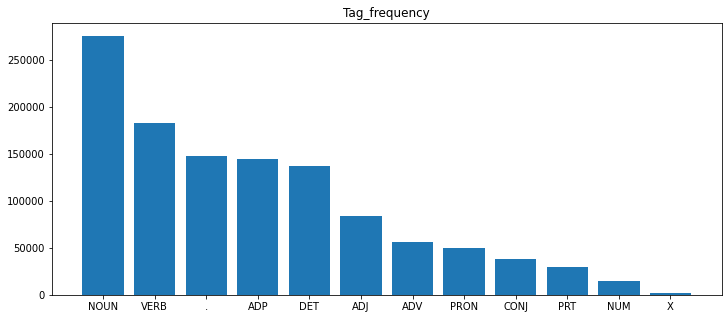

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(tag_num.index, tag_num.values)
plt.title("Tag_frequency")
plt.show()

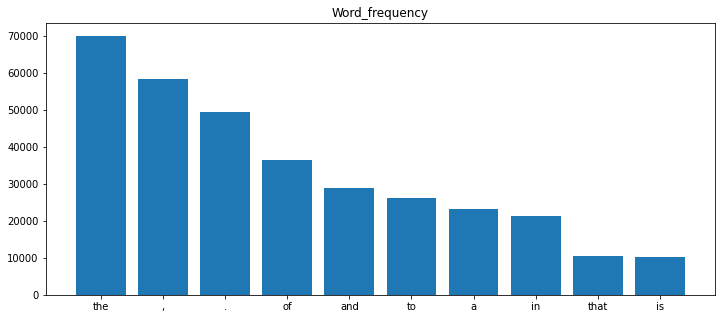

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(word_num.index[:10], word_num.values[:10])
plt.title("Word_frequency")
plt.show()

### Вопрос 1:
* Кол-во слова `cat` в корпусе? - 23

In [ ]:
word_num['cat']

23

### Вопрос 2:
* Самое популярное слово с самым популярным тегом? - time <br>(*сначала выбираете слова с самым популярным тегом, а затем выбираете самое популярное слово из уже выбранных*)

In [9]:
most_popular_tag = tag_num.index[0]
most_popular_words = [x[0] for x in brown_tagged_words if x[1] == most_popular_tag] # слова с самым популярным тегом
most_popular_words = pd.Series(nltk.FreqDist(most_popular_words)).sort_values(ascending=False) # сортируем слова по популярности
most_popular_words.index[0]

'time'

Впоследствии обучение моделей может занимать слишком много времени, работайте с подвыборкой, например, только текстами определенных категорий.

Категории нашего корпуса:

In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Будем работать с категорией humor

Cделайте случайное разбиение выборки на обучение и контроль в отношении 9:1. 

In [10]:
from sklearn.model_selection import train_test_split

def lower(sents):
    return [list(map(lambda x: (x[0].lower(), x[1]), sent)) for sent in sents]

def split_tr_ts(sents):
    sents = np.array(sents, dtype=object)
    return train_test_split(sents, test_size=0.1, random_state=0)

In [11]:
brown_tagged_humor_sents = lower(brown.tagged_sents(tagset="universal", categories='humor'))
train_humor_sents, test_humor_sents = split_tr_ts(brown_tagged_humor_sents)
len(train_humor_sents), len(test_humor_sents)

(947, 106)

In [12]:
brown_tagged_sents = lower(brown.tagged_sents(tagset='universal'))
train_sents, test_sents = split_tr_ts(brown_tagged_sents)
len(train_sents), len(test_sents)

(51606, 5734)

### Метод максимального правдоподобия для обучения модели

* $\normalsize S = s_0, s_1, ..., s_N$ - скрытые состояния, то есть различные теги
* $\normalsize O = o_0, o_1, ..., o_M$ - различные слова
* $\normalsize a_{i,j} = p(s_j|s_i)$ - вероятность того, что, находясь в скрытом состоянии $s_i$, мы попадем в состояние $s_j$ (элемент матрицы $A$)
* $\normalsize b_{k,j}=p(o_k|s_j)$ - вероятность того, что при скрытом состоянии $s_j$ находится слово $o_k$(элемент матрицы $B$)

$$\normalsize x_t \in O, y_t \in S$$
$\normalsize (x_t, y_t)$ - слово и тег, стоящие на месте $t$ $\Rightarrow$ 
* $\normalsize X$ - последовательность слов
* $\normalsize Y$ - последовательность тегов

Требуется построить скрытую марковскую модель (class HiddenMarkovModel) и написать метод fit для настройки всех её параметров с помощью оценок максимального правдоподобия по размеченным данным (последовательности пар слово+тег):

- Вероятности переходов между скрытыми состояниями $p(y_t | y_{t - 1})$ посчитайте на основе частот биграмм POS-тегов.


- Вероятности эмиссий наблюдаемых состояний $p(x_t | y_t)$ посчитайте на основе частот "POS-тег - слово".


- Распределение вероятностей начальных состояний $p(y_0)$ задайте равномерным.

Пример $X = [x_0, x_1], Y = [y_0, y_1]$:<br><br>
$$p(X, Y) = p(x_0, x_1, y_0, y_1) = p(y_0) \cdot p(x_0, x_1, y_1 | y_0) = p(y_0) \cdot p(x_0 | y_0) \cdot
p(x_1, y_1 | x_0, y_0) = \\ = p(y_0) \cdot p(x_0 | y_0) \cdot p(y_1 | x_0, y_0) \cdot p(x_1 | x_0, y_0, y_1)
= (\text{в силу условий нашей модели}) = \\ = p(y_0) \cdot p(x_0 | y_0) \cdot p(y_1 | y_0) \cdot p(x_1 | y_1) \Rightarrow$$ <br>
Для последовательности длины $n + 1$:<br>
$$p(X, Y) = p(x_0 ... x_{n - 1}, y_0 ... y_{n - 1}) \cdot p(y_n | y_{n - 1}) \cdot p(x_n | y_n)$$

#### Алгоритм Витерби для применения модели


Требуется написать метод .predict для определения частей речи на тестовой выборке. Чтобы использовать обученную модель на новых данных, необходимо реализовать алгоритм Витерби. Это алгоритм динамического программирования, с помощью которого мы будем находить наиболее вероятную последовательность скрытых состояний модели для фиксированной последовательности слов:

$$ \hat{Y} = \arg \max_{Y} p(Y|X) = \arg \max_{Y} p(Y, X) $$

Пусть $\normalsize Q_{t,s}$ - самая вероятная последовательность скрытых состояний длины $t$ с окончанием в состоянии $s$. $\normalsize q_{t, s}$ - вероятность этой последовательности.
$$(1)\: \normalsize q_{t,s} = \max_{s'} q_{t - 1, s'} \cdot p(s | s') \cdot p(o_t | s)$$
$\normalsize Q_{t,s}$ можно восстановить по argmax-ам.

Расшифровка формулы от меня (1) - вероятность, что на месте t стоит тег s -
это максимум по всем тегам от произведения вероятностей: 1) что на месте t-1 (т.е. на предыдущем месте) стоит один из всех тегов (перебираем их!), 2) что тег s встретится при условии одного из всех тегов (перебираем их!), 3) что текущее слово (т.е. в месте t) встретится при текущем теге (s). 

In [13]:
from tqdm import tqdm

In [14]:
class HiddenMarkovModel:    
    def __init__(self):
    
        pass
        
    def fit(self, train_tokens_tags_list):
        """
        train_tokens_tags_list: массив предложений пар слово-тег (выборка для train) 
        """
        tags = [tag for sent in train_tokens_tags_list
                for (word, tag) in sent]
        words = [word for sent in train_tokens_tags_list
                 for (word, tag) in sent]
        
        tag_num = pd.Series(nltk.FreqDist(tags)).sort_index()
        word_num = pd.Series(nltk.FreqDist(words)).sort_values(ascending=False)

        self.tags = tag_num.index
        self.words = word_num.index

        # самое популярное слово с самым популярным тэгом - нужно для predict
        self.most_popular_tag = tag_num.sort_values(ascending=False).index[0]
        popular_words = [x[0] for sent in train_tokens_tags_list for x in sent 
                              if x[1] == self.most_popular_tag] # слова с самым популярным тегом
        popular_words = pd.Series(nltk.FreqDist(popular_words)).sort_values(ascending=False) # сортируем слова по популярности
        self.most_popular_word = popular_words.index[0]
        
        A = pd.DataFrame({'{}'.format(tag) : [0] * len(tag_num) \
                          for tag in tag_num.index}, index=tag_num.index)  # пустая матрица тэг на тэг
        B = pd.DataFrame({'{}'.format(tag) : [0] * len(word_num) \
                          for tag in tag_num.index}, index=word_num.index) # пустая матрица слово на тэг
        
        # Вычисляем матрицу A и B по частотам слов и тегов
        
        # sent - предложение
        # sent[i][0] - i слово в этом предложении, sent[i][1] - i тег в этом предложении
        for sent in train_tokens_tags_list:
            for i in range(len(sent)):
                B.loc[sent[i][0], sent[i][1]] += 1 # текущая i-пара слово-тег (обновите матрицу B аналогично A)
                if len(sent) - 1 != i: # для последнего тега нет следующего тега
                    A.loc[sent[i][1], sent[i + 1][1]] += 1 # пара тег-тег
                
        
        # переходим к вероятностям
        
        # нормируем по строке, то есть по всем всевозможным следующим тегам
        # делим каждое значение на число, сколько данный следующий тэг встретился как следующий во всей выборке 
        A = A.divide(A.sum(axis=1), axis=0) # divide - деление с обработкой пропущенных значений
        
        # нормируем по столбцу, то есть по всем всевозможным текущим словам
        # делим каждое значение на число, сколько данное текущее слово встретилось во всей выборке 
        B = B / np.sum(B, axis=0) # здесь нет пропущенных значений
        
        self.A = A
        self.B = B
        
        return self
        
    def predict(self, test_tokens_list):
        """
        test_tokens_list : МАССИВ ПРЕДЛОЖЕНИЙ СЛОВ
        """
        # OrderedDict - помнит порядок, в котором ему были даны ключи
        predict_tags = OrderedDict({i : np.array([]) for i in range(len(test_tokens_list))})
        
        for i_sent in tqdm(range(len(test_tokens_list))):
            
            current_sent = test_tokens_list[i_sent] # текущее предложение
            len_sent = len(current_sent) # длина предложения 
            
            q = np.zeros(shape=(len_sent + 1, len(self.tags)))
            q[0] = 1 # нулевое состояние (равномерная инициализация по всем s) - первая строка, заполненная 1
            back_point = np.zeros(shape=(len_sent + 1, len(self.tags))) # argmax
            
            for t in range(len_sent):
                
                # если мы не встречали такое слово в обучении, то вместо него будет 
                # самое популярное слово с самым популярным тегом (вопрос 2)
                if current_sent[t] not in self.words:
                    current_sent[t] = self.most_popular_word
                    
                # через max выбираем ТЕГ ДЛЯ ТЕКУЩЕГО СЛОВА
                for i_s in range(len(self.tags)):
                    
                    s = self.tags[i_s]
                    
                    # формула (1)
                    # В матрице q строк (len_sent + 1) и первая строка с единицами
                    # Поэтому нулевое слово в current_sent будет не на нулевой строке q, а на первой, а current_sent[t] на строке t+1 
                    # Расшифровка формулы (1) - вероятность, что на месте t (это строка t+1 в матрице q!) стоит тег s -
                    # это максимум по всем тегам  - произведения вероятностей: 
                    # 1) что на предыдущем месте (это строка t в матрице q!) стоит один из всех тегов,
                    # 2) что тег s встретится при условии одного из всех тегов,
                    # 3) что текущее слово встретится при текущем теге (s). 
                    q[t + 1][i_s] = np.max(q[t] * # t-ая строка матрицы q, т.е. строка вероятностей всех предыдущих тегов
                        self.A.loc[:, s] * # столбец вероятностей перехода из всех тегов в тег s
                        self.B.loc[current_sent[t], s]) # вероятность встретить слово current_sent[t] с тегом s
                    
                    # argmax формула(1)
                    
                    # argmax, чтобы восстановить последовательность тегов
                    back_point[t + 1][i_s] = (q[t] * self.A.loc[:, s] * 
                        self.B.loc[current_sent[t],s]).reset_index()[s].idxmax() # ЧТО ТУТ ПРОИСХОДИТ?
                        # .reset_index() - когда мы сбрасываем индекс, старый индекс добавляется как столбец
                    
            back_point = back_point.astype('int')
            
            # выписываем теги, меняя порядок на реальный
            back_tag = deque()
            # collections.deque(iterable, [maxlen]) - создаёт очередь из итерируемого объекта с максимальной длиной maxlen. 
            # Очереди очень похожи на списки, за исключением того, что добавлять и удалять элементы можно либо справа, либо слева.
            current_tag = np.argmax(q[len_sent]) # последний тег?
            for t in range(len_sent, 0, -1): # идем в обратном порядке
                back_tag.appendleft(self.tags[current_tag])
                current_tag = back_point[t, current_tag] # ЧТО ТУТ ПРОИСХОДИТ?
             
            predict_tags[i_sent] = np.array(back_tag)
        
        
        return predict_tags                 

Обучите скрытую марковскую модель:

In [ ]:
HM_model_humor = HiddenMarkovModel()
HM_model_humor.fit(train_humor_sents)

In [ ]:
HM_model = HiddenMarkovModel()
HM_model.fit(train_sents)

Проверьте работу реализованного алгоритма на следующих модельных примерах, проинтерпретируйте результат.

- 'He can stay'
- 'a cat and a dog'
- 'I have a television'
- 'My favourite character'

In [ ]:
sents = [['He', 'can', 'stay'], ['a', 'cat', 'and', 'a', 'dog'], ['I', 'have', 'a', 'television'],
         ['My', 'favourite', 'character']]

sents_lower = [[word.lower() for word in sent] for sent in sents]

HM_model_humor_predict = HM_model_humor.predict(sents_lower)
HM_model_humor_predict

100%|██████████| 4/4 [00:00<00:00,  9.10it/s]


OrderedDict([(0, array(['PRON', 'VERB', 'VERB'], dtype='<U4')),
             (1, array(['DET', 'NOUN', 'CONJ', 'DET', 'NOUN'], dtype='<U4')),
             (2, array(['PRON', 'VERB', 'DET', 'NOUN'], dtype='<U4')),
             (3, array(['DET', 'NOUN', 'NOUN'], dtype='<U4'))])

In [ ]:
HM_model_predict = HM_model.predict(sents_lower)
HM_model_predict

100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


OrderedDict([(0, array(['PRON', 'VERB', 'VERB'], dtype='<U4')),
             (1, array(['DET', 'NOUN', 'CONJ', 'DET', 'NOUN'], dtype='<U4')),
             (2, array(['PRON', 'VERB', 'DET', 'NOUN'], dtype='<U4')),
             (3, array(['DET', 'NOUN', 'NOUN'], dtype='<U4'))])

### Вопрос 3:
* Какой тег вы получили для слова `can`? - VERB

In [ ]:
HM_model_humor_predict[0][1]

'VERB'

### Вопрос 4:
* Какой тег вы получили для слова `favourite`? - NOUN

In [ ]:
HM_model_humor_predict[3][1]

'NOUN'

Примените модель к отложенной выборке Брауновского корпуса и подсчитайте точность определения тегов (accuracy). Сделайте выводы. 

In [15]:
from itertools import chain # для распаковки списка списков

In [16]:
def accuracy_score(model, sents):
    words = [[x[0] for x in sent] for sent in sents]
    tags = [[x[1] for x in sent] for sent in sents]

    pred_tags = model.predict(words).values()

    tags = np.array(list(chain(*tags)))
    pred_tags = np.array(list(chain(*pred_tags)))

    true_pred = np.sum(tags==pred_tags)

    return true_pred / len(tags) * 100

In [ ]:
accuracy_score(HM_model_humor, test_humor_sents) # 88.82847256549678

100%|██████████| 106/106 [00:57<00:00,  1.85it/s]


88.82847256549678

In [ ]:
accuracy_score(HM_model, test_sents) # 96.26295331104619

100%|██████████| 5734/5734 [50:44<00:00,  1.88it/s]


96.26295331104619

### Вопрос 5:
* Какое качество вы получили(округлите до одного знака после запятой)? - 88.8

Чем больше выборка, на которой обучена модель, тем лучше качество предсказания.

## DefaultTagger

### Вопрос 6:
* Какое качество вы бы получили, если бы предсказывали любой тег, как самый популярный тег на выборке train(округлите до одного знака после запятой)? - 20.2

Вы можете испоьзовать DefaultTagger(метод tag для предсказания частей речи предложения)

In [ ]:
from nltk.tag import DefaultTagger
default_tagger = DefaultTagger(HM_model_humor.most_popular_tag) # NOUN

In [ ]:
def accuracy_score_default_tagger(model, sents):
    words = [[x[0] for x in sent] for sent in sents]
    tags = [[x[1] for x in sent] for sent in sents]

    pred_tags = [default_tagger.tag(w) for w in words]
    pred_tags = [x[1] for x in list(chain(*pred_tags))]

    tags = np.array(list(chain(*tags)))

    true_pred = np.sum(tags==pred_tags)

    return true_pred / len(tags) * 100

In [ ]:
acc_default_tagger = round(accuracy_score_default_tagger(default_tagger, test_humor_sents), 1)
acc_default_tagger

20.2

## NLTK, Rnnmorph

Вспомним первый [семинар](https://colab.research.google.com/drive/1FHZVU6yJT61J8w1hALno0stD4VU36rit?usp=sharing) нашего курса. В том семинаре мы с вами работали c некоторыми библиотеками.

Не забудьте преобразовать систему тэгов из `'en-ptb' в 'universal'` с помощью функции `map_tag` или используйте `tagset='universal'`

In [18]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
def accuracy_score_nltk_pos_tag(sents):
    words = [[x[0] for x in sent] for sent in sents]
    tags = [[x[1] for x in sent] for sent in sents]

    pred_tags = [nltk.pos_tag(w, tagset='universal') for w in words]
    pred_tags = [x[1] for x in list(chain(*pred_tags))]

    tags = np.array(list(chain(*tags)))

    true_pred = np.sum(tags==pred_tags)

    return true_pred / len(tags) * 100

In [22]:
round(accuracy_score_nltk_pos_tag(test_humor_sents), 1)


89.2

In [23]:
!pip3 install -q --upgrade nltk rnnmorph

     |████████████████████████████████| 1.5 MB 4.6 MB/s 
     |████████████████████████████████| 19.7 MB 54 kB/s 
     |████████████████████████████████| 748 kB 61.2 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 8.2 MB 12.9 MB/s 


In [24]:
from rnnmorph.predictor import RNNMorphPredictor
predictor = RNNMorphPredictor(language="en")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [25]:
# predictor.predict(['He', 'can', 'stay'])

[<normal_form=He; word=He; pos=PRON; tag=Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs; score=1.0000>,
 <normal_form=can; word=can; pos=AUX; tag=VerbForm=Fin; score=1.0000>,
 <normal_form=stay; word=stay; pos=VERB; tag=VerbForm=Inf; score=0.9998>]

In [26]:
def accuracy_score_rnnmorph(sents):
    words = [[x[0] for x in sent] for sent in sents]
    tags = [[x[1] for x in sent] for sent in sents]

    pred_tags = [predictor.predict(w) for w in words]
    pred_tags = [x.pos for x in list(chain(*pred_tags))]

    tags = np.array(list(chain(*tags)))

    true_pred = np.sum(tags==pred_tags)

    return true_pred / len(tags) * 100

In [27]:
round(accuracy_score_rnnmorph(test_humor_sents), 1)

62.8

### Вопрос 7:
* Какое качество вы получили, используя каждую из двух библиотек? Сравните их результаты - 89.2 c nltk_pos_tag и 62.8 с rnnmorph.


* Качество с библиотекой rnnmorph должно быть хуже, так как там используется немного другая система тэгов. Какие здесь отличия? - Вместо тэга '.' используется 'PUNCT', вместо 'CONJ' - 'CCONJ', вместо 'PRT' - 'PART', а также в rnnmorph есть ряд тэгов, которых нет в Universal Dependencies.

In [30]:
def tags_rnnmorph(sents):
    words = [[x[0] for x in sent] for sent in sents]
    pred_tags = [predictor.predict(w) for w in words]
    pred_tags = [x.pos for x in list(chain(*pred_tags))]
    return set(pred_tags)

def tags_nltk_pos_tag(sents):
    words = [[x[0] for x in sent] for sent in sents]
    pred_tags = [nltk.pos_tag(w, tagset='universal') for w in words]
    pred_tags = [x[1] for x in list(chain(*pred_tags))]
    return set(pred_tags)    

In [31]:
t_rnnmorph = tags_rnnmorph(test_humor_sents)
t_nltk_pos_tag = tags_nltk_pos_tag(test_humor_sents)

t_rnnmorph - t_nltk_pos_tag

{'AUX', 'CCONJ', 'INTJ', 'PART', 'PROPN', 'PUNCT', 'SCONJ', 'X'}

In [32]:
t_nltk_pos_tag - t_rnnmorph

{'.', 'CONJ', 'PRT'}

## BiLSTMTagger

### Подготовка данных

Изменим структуру данных

In [53]:
# pos_data = [list(zip(*sent)) for sent in brown_tagged_sents]
pos_data = [list(zip(*sent)) for sent in brown_tagged_humor_sents]

print(pos_data[0])

[('it', 'was', 'among', 'these', 'that', 'hinkle', 'identified', 'a', 'photograph', 'of', 'barco', '!', '!'), ('PRON', 'VERB', 'ADP', 'DET', 'ADP', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'NOUN', '.', '.')]


До этого мы писали много кода сами, теперь пора эксплуатировать pytorch

In [54]:
from torchtext.legacy.data import Field, BucketIterator
import torchtext

# наши поля
WORD = Field(lower=True)
TAG = Field(unk_token=None) # все токены нам известны

# создаем примеры
examples = []
for words, tags in pos_data:
    examples.append(torchtext.legacy.data.Example.fromlist([list(words), list(tags)], fields=[('words', WORD), ('tags', TAG)]))

Вот один наш пример:

In [55]:
print(vars(examples[0]))

{'words': ['it', 'was', 'among', 'these', 'that', 'hinkle', 'identified', 'a', 'photograph', 'of', 'barco', '!', '!'], 'tags': ['PRON', 'VERB', 'ADP', 'DET', 'ADP', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'NOUN', '.', '.']}


Теперь формируем наш датасет

In [56]:
# кладем примеры в наш датасет
dataset = torchtext.legacy.data.Dataset(examples, fields=[('words', WORD), ('tags', TAG)])

train_data, valid_data, test_data = dataset.split(split_ratio=[0.8, 0.1, 0.1])

print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")

Number of training examples: 842
Number of validation examples: 106
Number of testing examples: 105


Построим словари. Параметр `min_freq` выберете сами. При построении словаря используем только **train**

In [57]:
WORD.build_vocab(train_data, min_freq=3)
TAG.build_vocab(train_data)

print(f"Unique tokens in source vocabulary: {len(WORD.vocab)}")
print(f"Unique tokens in target vocabulary: {len(TAG.vocab)}")

print(WORD.vocab.itos[::200])
print(TAG.vocab.itos)

Unique tokens in source vocabulary: 715
Unique tokens in target vocabulary: 13
['<unk>', 'see', 'burnside', 'horror']
['<pad>', 'NOUN', 'VERB', '.', 'DET', 'ADP', 'ADJ', 'PRON', 'ADV', 'CONJ', 'PRT', 'NUM', 'X']


In [58]:
print(vars(train_data.examples[9])) # vars - Возвращает словарь из атрибута __dict__ указанного объекта

{'words': ['``', 'of', 'course', ',', 'dear', "''", ',', 'she', 'said', '.'], 'tags': ['.', 'ADP', 'NOUN', '.', 'ADJ', '.', '.', 'PRON', 'VERB', '.']}


Посмотрим с насколько большими предложениями мы имеем дело

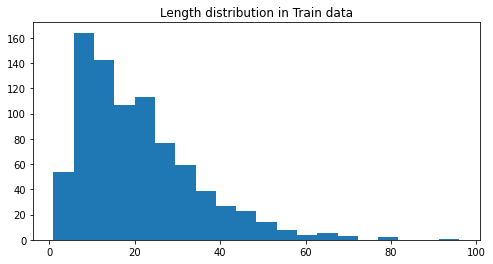

In [59]:
length = map(len, [vars(x)['words'] for x in train_data.examples])

plt.figure(figsize=[8, 4])
plt.title("Length distribution in Train data")
plt.hist(list(length), bins=20);

Для обучения `BiLSTM` лучше использовать colab

In [40]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Для более быстрого и устойчивого обучения сгруппируем наши данные по батчам

In [60]:
# бьем нашу выборку на батч, не забывая сначала отсортировать выборку по длине
def _len_sort_key(x):
    return len(x.words)

BATCH_SIZE = 32

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort_key=_len_sort_key
)

In [61]:
# посморим  на количество батчей
list(map(len, [train_iterator, valid_iterator, test_iterator]))

[27, 4, 4]

### Модель и её обучение

Инициализируем нашу модель

In [62]:
class LSTMTagger(nn.Module):

    def __init__(self, input_dim, emb_dim, hid_dim, output_dim, dropout, bidirectional=False):
        super().__init__()
  
        self.embeddings = nn.Embedding(input_dim, emb_dim)
        self.dropout = nn.Dropout(dropout)
        
        self.rnn = nn.LSTM(emb_dim, hid_dim, num_layers=3,  dropout=dropout, bidirectional=bidirectional)
        # если bidirectional, то предсказываем на основе конкатенации двух hidden
        self.tag = nn.Linear((1 + bidirectional) * hid_dim, output_dim)

    def forward(self, sent):
        
        #sent = [sent len, batch size] 
        
        # не забываем применить dropout к embedding
        embedded = self.embeddings(sent)
        embedded = self.dropout(embedded)
        #embedded = [sent len, batch size, emb_dim]
        
        output, _ = self.rnn(embedded)
        #output = [sent len, batch size, hid dim * n directions]

        prediction = self.tag(self.dropout(output))
        #prediction = [sent len, batch size, output_dim]
    
        return prediction
        
# параметры модели
INPUT_DIM = len(WORD.vocab)
OUTPUT_DIM = len(TAG.vocab)
EMB_DIM = 200
HID_DIM = 128
DROPOUT = 0.5
BIDIRECTIONAL = True

model = LSTMTagger(INPUT_DIM, EMB_DIM, HID_DIM, OUTPUT_DIM, DROPOUT, BIDIRECTIONAL).to(device)

# инициализируем веса
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param, -0.08, 0.08)
        
model.apply(init_weights)

LSTMTagger(
  (embeddings): Embedding(715, 200)
  (dropout): Dropout(p=0.5, inplace=False)
  (rnn): LSTM(200, 128, num_layers=3, dropout=0.5, bidirectional=True)
  (tag): Linear(in_features=256, out_features=13, bias=True)
)

Подсчитаем количество обучаемых параметров нашей модели

In [44]:
!pip install torchinfo
from torchinfo import summary

In [63]:
def count_parameters(model):
    model_info = summary(model)
    return model_info.trainable_params

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 1,274,789 trainable parameters


Погнали обучать

In [64]:
PAD_IDX = TAG.vocab.stoi['<pad>']
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)
patience=3

def train(model, iterator, optimizer, criterion, clip, train_history=None, valid_history=None):
    model.train()
    
    epoch_loss = 0
    history = []
    for i, batch in enumerate(iterator):
        
        input = batch.words.to(device)
        tags = batch.tags.to(device)
        
        optimizer.zero_grad()
        
        output = model(input)
        
        #tags = [sent len, batch size]
        #output = [sent len, batch size, output dim]
        
        output = torch.reshape(output, (output.shape[0]*output.shape[1], -1))
        tags = tags.view(-1)
        
        #output = [sent len * batch size, output dim]
        #tags = [sent len * batch size]
        
        loss = criterion(output, tags)
        
        loss.backward()
        
        # Gradient clipping(решение проблемы взрыва граденты), clip - максимальная норма вектора
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
        history.append(loss.cpu().data.numpy())
        if (i+1)%10==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')
            
            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()
            
            plt.show()

        
    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()
    
    epoch_loss = 0
    
    history = []
    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            input = batch.words.to(device)
            tags = batch.tags.to(device)

            output = model(input)

            #tags = [sent len, batch size]
            #output = [sent len, batch size, output dim]

            output = torch.reshape(output, (output.shape[0]*output.shape[1], -1))
            tags = tags.view(-1)

            #output = [sent len * batch size, output dim]- НЕТ, [sent len * batch size]!
            #tags = [sent len * batch size]
            
            loss = criterion(output, tags)
            
            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

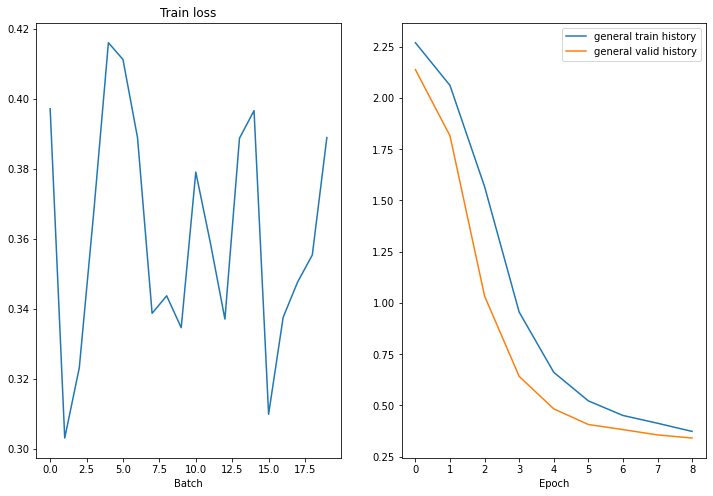

Epoch: 10 | Time: 0m 1s
	Train Loss: 0.363 | Train PPL:   1.437
	 Val. Loss: 0.337 |  Val. PPL:   1.401


In [65]:
import time
import math
import matplotlib
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

train_history = []
valid_history = []

N_EPOCHS = 10
CLIP = 1
cur_patience = 0

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP, train_history, valid_history)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-val-model.pt')
    else:
        cur_patience += 1
        if cur_patience == patience:
            cur_patience = 0
            break    

    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

### Применение модели

In [66]:
def accuracy_model(model, iterator):
    model.eval()
    
    true_pred = 0
    num_pred = 0
    
    with torch.no_grad():
        for i, batch in enumerate(iterator):

            input = batch.words.to(device)
            tags = batch.tags.to(device)

            output = model(input)
            
            #output = [sent len, batch size, output dim]
            output = torch.argmax(output, dim=2).view(-1)
            tags = tags.view(-1)
            
            #output = [sent len, batch size]
            predict_tags = output.cpu().numpy()
            true_tags = tags.cpu().numpy()

            true_pred += np.sum((true_tags == predict_tags) & (true_tags != PAD_IDX))
            num_pred += np.prod(true_tags.shape) - (true_tags == PAD_IDX).sum()
        
    return round(true_pred / num_pred * 100, 3)

In [67]:
print("Accuracy:", accuracy_model(model, test_iterator), '%')
# Вся выборка! Accuracy: 97.442 % - добавила дропаут в LSTM и линейный слой, EMB_DIM = 200, HID_DIM = 128, DROPOUT = 0.5
# Категория humor! Accuracy: 89.344 %

Accuracy: 89.344 %


In [ ]:
# https://github.com/bentrevett/pytorch-pos-tagging/blob/master/1_bilstm.ipynb
# https://towardsdatascience.com/taming-lstms-variable-sized-mini-batches-and-why-pytorch-is-good-for-your-health-61d35642972e

Вы можете улучшить качество, изменяя параметры модели. Но чтобы добиться нужного качества, вам неообходимо взять все выборку, а не только категорию `humor`.

Вам неоходимо добиться качества не меньше, чем `accuracy = 93 %` 

In [50]:
best_model = LSTMTagger(INPUT_DIM, EMB_DIM, HID_DIM, OUTPUT_DIM, DROPOUT, BIDIRECTIONAL).to(device)
best_model.load_state_dict(torch.load('best-val-model.pt'))
assert accuracy_model(best_model, test_iterator) >= 93

Пример решение нашей задачи:

In [51]:
def print_tags(model, data):
    model.eval()
    
    with torch.no_grad():
        words, _ = data
        example = torch.LongTensor([WORD.vocab.stoi[elem] for elem in words]).unsqueeze(1).to(device)
        
        output = model(example).argmax(dim=-1).cpu().numpy()
        tags = [TAG.vocab.itos[int(elem)] for elem in output]

        for token, tag in zip(words, tags):
            print(f'{token:15s}{tag}')

In [52]:
print_tags(model, pos_data[-1])

from           ADP
what           DET
i              PRON
was            VERB
able           ADJ
to             ADP
gauge          NOUN
in             ADP
a              DET
swift          ADJ
,              .
greedy         ADJ
glance         NOUN
,              .
the            DET
figure         NOUN
inside         ADP
the            DET
coral-colored  ADJ
boucle         NOUN
dress          NOUN
was            VERB
stupefying     VERB
.              .


## Сравните результаты моделей HiddenMarkov, LstmTagger:
* при обучение на маленькой части корпуса, например, на категории humor - HiddenMarkov: 88.828 % и LstmTagger: 89.344 %
* при обучении на всем корпусе - HiddenMarkov: 96.263 % и LstmTagger: 97.442 %